## Load data

In [0]:
# Week 2 homework, Cifar10 dataset classifier.
# Loading Cifar10 dataset
from keras.datasets import cifar10
#the convolutional neural network
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D   #the connection is a convolution on 2D image
from keras.layers import MaxPooling2D  #maxpooling is taking subsamples with 
from keras.layers import Flatten, Dropout       #no change except dimensions

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print('x_train shape:', x_train.shape)   
print('y_train shape:', y_train.shape)  
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
#Inspect 1 data point, the first image
image1=x_train[0]
label1=y_train[0]
#print (image1)
#print ('data label=', label1)  #show data label

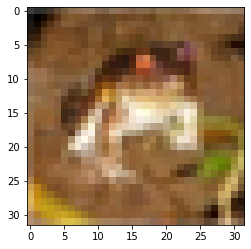

In [0]:
from matplotlib import pyplot

#imshow does image display, image 1 is 32x32x3 3-d array (tensor)
pyplot.imshow(image1);

In [0]:
#review pixel values at different points
print (image1[0][0])  #darker means smaller value
print (image1[15][15])
#show red color, the first element is the largest
print (image1[7][16])
#show gree color, the second element is the largest
print (image1[23][27])

[59 62 63]
[247 234 212]
[181 102  69]
[118 141  20]


In [0]:
# Normalize the number to be between 0 and 1 (the max is 255)

#convert the data type to floating number
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train / 255
x_test = x_test / 255

In [0]:
# convert class vectors to 1-hot representation
num_classes = 10

from keras.utils import to_categorical
print (y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print (y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
input_shape = (32, 32, 3)
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                 input_shape=input_shape, padding='same'))   #padding='same' means the same as kernel size
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model2.add(Conv2D(32, (3, 3), activation='relu',padding='same'))  #default strides=(1,1)
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Dropout(0.3))
model2.add(Flatten())  
model2.add(Dense(1000, activation='relu')) #1000 is the number of nodes on this layer
model2.add(Dense(num_classes, activation='softmax'))  #Output layer

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 31, 31, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 32)        

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [50]:
model2.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1, 
          validation_data=(x_test, y_test))  #verbose=1 shows progress bar,

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 208s 4ms/step - loss: 1.4613 - acc: 0.4719 - val_loss: 1.1424 - val_acc: 0.5967
Epoch 2/20
50000/50000 [==============================] - 206s 4ms/step - loss: 1.0984 - acc: 0.6098 - val_loss: 0.9870 - val_acc: 0.6465
Epoch 3/20
50000/50000 [==============================] - 205s 4ms/step - loss: 0.9434 - acc: 0.6666 - val_loss: 0.8715 - val_acc: 0.6946
Epoch 4/20
50000/50000 [==============================] - 203s 4ms/step - loss: 0.8167 - acc: 0.7121 - val_loss: 0.7964 - val_acc: 0.7272
Epoch 5/20
50000/50000 [==============================] - 202s 4ms/step - loss: 0.7063 - acc: 0.7527 - val_loss: 0.7940 - val_acc: 0.7272
Epoch 6/20
50000/50000 [==============================] - 202s 4ms/step - loss: 0.6113 - acc: 0.7867 - val_loss: 0.7285 - val_acc: 0.7451
Epoch 7/20
50000/50000 [==============================] - 202s 4ms/step - loss: 0.5146 - acc: 0.8193 - val_loss: 0.7282 - 